In [6]:
# numpy for numerical analysis
import numpy as np

# pandas to process the data in a dataframe
import pandas as pd

# matplotlib for basic visulaisation
from matplotlib import pyplot as plt

# seaborn for more advanced plotting
import seaborn as sns

In [7]:
# Filepath to read
vgsales=pd.read_csv("vgsales.csv")

In [8]:
# All the SALES are in millions and renamed in lower cases
vgsales = vgsales.rename(columns={'Rank':'rank','Year':'year','Name': 'name','Platform':'platform','Genre':'genre','Publisher':'publisher','NA_Sales':'na_sales','EU_Sales':'eu_sales','JP_Sales':'jp_sales','Other_Sales':'other_sales','Global_Sales': 'total_sales', })
vgsales = vgsales.sort_values('total_sales', ascending = False)
vgsales = vgsales.dropna()
display(vgsales.head(10))

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [9]:
# Find data field headers and datatype
vgsales.info()

# Find number of rows & columns
vgsales.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16596 entries, 0 to 16595
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         16596 non-null  int64  
 1   name         16596 non-null  object 
 2   platform     16596 non-null  object 
 3   year         16596 non-null  int64  
 4   genre        16596 non-null  object 
 5   publisher    16596 non-null  object 
 6   na_sales     16596 non-null  float64
 7   eu_sales     16596 non-null  float64
 8   jp_sales     16596 non-null  float64
 9   other_sales  16596 non-null  float64
 10  total_sales  16596 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


(16596, 11)

In [10]:
vgsales.isnull().sum()

rank           0
name           0
platform       0
year           0
genre          0
publisher      0
na_sales       0
eu_sales       0
jp_sales       0
other_sales    0
total_sales    0
dtype: int64

In [ ]:
display(vgsales.describe())

In [11]:
#OVERVIEW OF THE REGIONAL SALES DATA
vgsales[['na_sales', 'eu_sales', 'jp_sales','other_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales
count,16596.000000,16596.000000,16596.000000,16596.000000
mean,0.264683,0.146670,0.077789,0.048068
std,0.816730,0.505379,0.309309,0.188599
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.040000
max,41.490000,29.020000,10.220000,10.570000


In [12]:
#Making a Sales bucket with conditional statement and adding the column to VGSALES 
vgsales.loc[vgsales['total_sales'] == 0.00, 'total_sales_bucket'] = '0 Sales'
vgsales.loc[(vgsales['total_sales'] >= 0.00) & (vgsales['total_sales'] < 5.00), 'total_sales_bucket'] = '0 - 5 Million' 
vgsales.loc[(vgsales['total_sales'] >= 5.00) & (vgsales['total_sales'] < 10.00), 'total_sales_bucket'] = '5 - 10 Million'
vgsales.loc[(vgsales['total_sales'] >= 10.00) & (vgsales['total_sales'] < 50.00), 'total_sales_bucket'] = '10 - 50 Million'
vgsales.loc[(vgsales['total_sales'] >= 50.00) & (vgsales['total_sales'] < 100.00), 'total_sales_bucket'] = '50 - 100 Million'
vgsales.loc[vgsales['total_sales'] >= 100.00, 'total_sales_bucket'] = ' 100+ Million' 
vgsales

# Syntax Used
#df.loc[(df['Existing_col'] > N1) & (df['Existing_col'] < N2), 'New_Column'] = 'chr'

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,total_sales,total_sales_bucket
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,50 - 100 Million
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,10 - 50 Million
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,10 - 50 Million
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,10 - 50 Million
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,10 - 50 Million
...,...,...,...,...,...,...,...,...,...,...,...,...
16174,16175,San-X Character Channel: All-Star Daishuugou!,DS,2008,Action,MTO,0.00,0.00,0.01,0.00,0.01,0 - 5 Million
16175,16176,Rail Simulator,PC,2007,Simulation,Electronic Arts,0.00,0.01,0.00,0.00,0.01,0 - 5 Million
16178,16179,Rozen Maiden: Gebetgarten,PS2,2007,Fighting,Taito,0.00,0.00,0.01,0.00,0.01,0 - 5 Million
16180,16181,Princess Arthur,PSP,2013,Misc,Idea Factory,0.00,0.00,0.01,0.00,0.01,0 - 5 Million


In [13]:
#Making sales Bucket for all the Regions

#For North American Sales
vgsales.loc[vgsales['na_sales'] == 0.00, 'na_sales_bucket'] = '0 Sales'
vgsales.loc[(vgsales['na_sales'] >= 0.00) & (vgsales['na_sales'] < 5.00), 'na_sales_bucket'] = '0 - 5 Million' 
vgsales.loc[(vgsales['na_sales'] >= 5.00) & (vgsales['na_sales'] < 10.00), 'na_sales_bucket'] = '5 - 10 Million'
vgsales.loc[(vgsales['na_sales'] >= 10.00) & (vgsales['na_sales'] < 50.00), 'na_sales_bucket'] = '10 - 50 Million'
vgsales.loc[(vgsales['na_sales'] >= 50.00) & (vgsales['na_sales'] < 100.00), 'na_sales_bucket'] = '50 - 100 Million'
vgsales.loc[vgsales['na_sales'] >= 100.00, 'na_sales_bucket'] = ' 100+ Million' 

#For European Sales
vgsales.loc[vgsales['eu_sales'] == 0.00, 'eu_sales_bucket'] = '0 Sales'
vgsales.loc[(vgsales['eu_sales'] >= 0.00) & (vgsales['eu_sales'] < 5.00), 'eu_sales_bucket'] = '0 - 5 Million' 
vgsales.loc[(vgsales['eu_sales'] >= 5.00) & (vgsales['eu_sales'] < 10.00), 'eu_sales_bucket'] = '5 - 10 Million'
vgsales.loc[(vgsales['eu_sales'] >= 10.00) & (vgsales['eu_sales'] < 50.00), 'eu_sales_bucket'] = '10 - 50 Million'
vgsales.loc[(vgsales['eu_sales'] >= 50.00) & (vgsales['eu_sales'] < 100.00), 'eu_sales_bucket'] = '50 - 100 Million'
vgsales.loc[vgsales['eu_sales'] >= 100.00, 'eu_sales_bucket'] = ' 100+ Million' 


#For Japanese Sales 
vgsales.loc[vgsales['jp_sales'] == 0.00, 'jp_sales_bucket'] = '0 Sales'
vgsales.loc[(vgsales['jp_sales'] >= 0.00) & (vgsales['jp_sales'] < 5.00), 'jp_sales_bucket'] = '0 - 5 Million' 
vgsales.loc[(vgsales['jp_sales'] >= 5.00) & (vgsales['jp_sales'] < 10.00), 'jp_sales_bucket'] = '5 - 10 Million'
vgsales.loc[(vgsales['jp_sales'] >= 10.00) & (vgsales['jp_sales'] < 50.00), 'jp_sales_bucket'] = '10 - 50 Million'
vgsales.loc[(vgsales['jp_sales'] >= 50.00) & (vgsales['jp_sales'] < 100.00), 'jp_sales_bucket'] = '50 - 100 Million'
vgsales.loc[vgsales['jp_sales'] >= 100.00, 'jp_sales_bucket'] = ' 100+ Million' 

#For Other Sales
vgsales.loc[vgsales['other_sales'] == 0.00, 'other_sales_bucket'] = '0 Sales'
vgsales.loc[(vgsales['other_sales'] >= 0.00) & (vgsales['other_sales'] < 5.00), 'other_sales_bucket'] = '0 - 5 Million' 
vgsales.loc[(vgsales['other_sales'] >= 5.00) & (vgsales['other_sales'] < 10.00), 'other_sales_bucket'] = '5 - 10 Million'
vgsales.loc[(vgsales['other_sales'] >= 10.00) & (vgsales['other_sales'] < 50.00), 'other_sales_bucket'] = '10 - 50 Million'
vgsales.loc[(vgsales['other_sales'] >= 50.00) & (vgsales['other_sales'] < 100.00), 'other_sales_bucket'] = '50 - 100 Million'
vgsales.loc[vgsales['other_sales'] >= 100.00, 'other_sales_bucket'] = ' 100+ Million' 
vgsales



,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,total_sales,total_sales_bucket,na_sales_bucket,eu_sales_bucket,jp_sales_bucket,other_sales_bucket
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,50 - 100 Million,10 - 50 Million,10 - 50 Million,0 - 5 Million,5 - 10 Million
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,10 - 50 Million,10 - 50 Million,0 - 5 Million,5 - 10 Million,0 - 5 Million
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,10 - 50 Million,10 - 50 Million,10 - 50 Million,0 - 5 Million,0 - 5 Million
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,10 - 50 Million,10 - 50 Million,10 - 50 Million,0 - 5 Million,0 - 5 Million
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,10 - 50 Million,10 - 50 Million,5 - 10 Million,10 - 50 Million,0 - 5 Million
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16174,16175,San-X Character Channel: All-Star Daishuugou!,DS,2008,Action,MTO,0.00,0.00,0.01,0.00,0.01,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million
16175,16176,Rail Simulator,PC,2007,Simulation,Electronic Arts,0.00,0.01,0.00,0.00,0.01,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million
16178,16179,Rozen Maiden: Gebetgarten,PS2,2007,Fighting,Taito,0.00,0.00,0.01,0.00,0.01,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million
16180,16181,Princess Arthur,PSP,2013,Misc,Idea Factory,0.00,0.00,0.01,0.00,0.01,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million


In [160]:
#Making a table for total number of sales bucket per range entries
vgbucket = vgsales.groupby('total_sales_bucket').agg({'total_sales_bucket': 'count'})
vgbucket= vgbucket.rename(columns={'total_sales_bucket' : 'total_entries'})
vgbucket.sort_values("total_entries").reset_index()

,total_sales_bucket,total_entries
0,50 - 100 Million,1
1,10 - 50 Million,61
2,5 - 10 Million,145
3,0 - 5 Million,16389


In [161]:
vgsales.loc[vgsales.platform == 'PC'].sort_values('year').head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,total_sales,total_sales_bucket,na_sales_bucket,eu_sales_bucket,jp_sales_bucket,other_sales_bucket
14333,14334,Alter Ego,PC,1985,Simulation,Activision,0.00,0.03,0.0,0.01,0.03,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million
14505,14506,SimCity,PC,1988,Simulation,Maxis,0.00,0.02,0.0,0.01,0.03,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million
2633,2634,The 7th Guest,PC,1992,Adventure,Virgin Interactive,0.01,0.77,0.0,0.00,0.78,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million
16071,16072,Empire Deluxe,PC,1992,Strategy,New World Computing,0.01,0.00,0.0,0.00,0.01,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million
765,766,SimCity 2000,PC,1992,Simulation,Maxis,1.20,0.84,0.0,0.10,2.14,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million


In [162]:
#Making a table for total number of NA sales bucket per range entries
vgbucketna = vgsales.groupby('na_sales_bucket').agg({'na_sales_bucket': 'count'})
vgbucketna= vgbucketna.rename(columns={'na_sales_bucket' : 'total_entries_na'})
bucket_na = vgbucketna.sort_values("total_entries_na").reset_index()
bucket_na

,na_sales_bucket,total_entries_na
0,10 - 50 Million,13
1,5 - 10 Million,45
2,0 - 5 Million,16538


In [163]:
#Making a table for total number of EU sales bucket per range entries
vgbucketeu = vgsales.groupby('eu_sales_bucket').agg({'eu_sales_bucket': 'count'})
vgbucketeu= vgbucketeu.rename(columns={'eu_sales_bucket' : 'total_entries_eu'})
bucketeu= vgbucketeu.sort_values("total_entries_eu").reset_index()
bucketeu

,eu_sales_bucket,total_entries_eu
0,10 - 50 Million,4
1,5 - 10 Million,23
2,0 - 5 Million,16569


In [164]:
#Making a table for total number of JP sales bucket per range entries
vgbucketjp = vgsales.groupby('jp_sales_bucket').agg({'jp_sales_bucket': 'count'})
vgbucketjp= vgbucketjp.rename(columns={'jp_sales_bucket' : 'total_entries_jp'})
bucketjp = vgbucketjp.sort_values("total_entries_jp").reset_index()
bucketjp

,jp_sales_bucket,total_entries_jp
0,10 - 50 Million,1
1,5 - 10 Million,8
2,0 - 5 Million,16587


In [165]:
#Making a table for total number of JP sales bucket per range entries
vgbucketot = vgsales.groupby('other_sales_bucket').agg({'other_sales_bucket': 'count'})
vgbucketot= vgbucketot.rename(columns={'other_sales_bucket' : 'total_entries_other'})
bucket_other = vgbucketot.sort_values("total_entries_other").reset_index()
bucket_other

,other_sales_bucket,total_entries_other
0,10 - 50 Million,1
1,5 - 10 Million,2
2,0 - 5 Million,16593


In [166]:
sales_bucket = pd.concat([bucket_na,bucketeu,bucketjp,bucket_other], axis=1)
sales_bucket.drop(['eu_sales_bucket',"jp_sales_bucket","other_sales_bucket"], axis=1).rename(columns={"na_sales_bucket":"sales_range"})

,sales_range,total_entries_na,total_entries_eu,total_entries_jp,total_entries_other
0,10 - 50 Million,13,4,1,1
1,5 - 10 Million,45,23,8,2
2,0 - 5 Million,16538,16569,16587,16593


In [167]:
#Making a countplot that shows the count of sales bracket using Seaborn
#sns.set_style("whitegrid")
#vg = sns.countplot(x= "total_sales_bucket", data = vgsales)
#vg.set(xlabel = "Sales Bucket")
#plt.rcParams['figure.figsize']=(15,10)
#vg.set_title("Distribution of Total Sales Bracket")

#there is no point in distribution plot

In [168]:
#Using Count plot for determining the distribution on sales among different categories
#Genre 
#NA Sales bucket vs Genre
#EU Sales bucket vs Genre
#JP Sales bucket vs Genre
#Other Sales bucket vs Genre

In [169]:
vgsales.groupby('platform')['total_sales'].describe().sort_values("count", ascending=False).reset_index()

,platform,count,mean,std,min,25%,50%,75%,max
0,PS2,2161.0,0.581046,1.137990,0.01,0.0800,0.230,0.5600,20.81
1,DS,2132.0,0.383992,1.444534,0.01,0.0500,0.110,0.2800,30.01
2,PS3,1329.0,0.720722,1.412850,0.01,0.1100,0.280,0.7700,21.40
3,Wii,1325.0,0.699404,3.138056,0.01,0.0900,0.200,0.4900,82.74
4,X360,1265.0,0.774672,1.618906,0.01,0.1100,0.280,0.7700,21.82
5,PSP,1213.0,0.244254,0.522460,0.01,0.0300,0.090,0.2300,7.72
6,PS,1196.0,0.610920,1.054687,0.01,0.1075,0.260,0.6600,10.95
7,PC,960.0,0.269604,0.681493,0.01,0.0200,0.040,0.1800,8.11
8,XB,824.0,0.313422,0.534302,0.01,0.0700,0.140,0.3500,8.49
9,GBA,822.0,0.387470,0.896517,0.01,0.0600,0.165,0.3900,15.85


In [170]:
#making a  table for number of games for platforms using groupby
vgsales_platform = vgsales.groupby('platform').agg({'total_sales':'sum', 'name': 'count'})

#Renaming the columns in lowercases
vgsales_plat= vgsales_platform.rename(columns={'total_sales': 'total_sales_in_millions', 'name' : 'num_of_games'}) 

# Resetting Index
vgsales_plat1 = vgsales_plat.reset_index() 
vgsales_plat1

,platform,total_sales_in_millions,num_of_games
0,2600,97.08,133
1,3DO,0.10,3
2,3NDS,1.18,9
3,DC,15.97,52
4,DS,818.67,2132
5,GB,255.45,98
6,GBA,318.50,822
7,GC,199.36,556
8,GEN,28.36,27
9,GG,0.04,1


In [171]:
#Calculated Percent Number of Games
vgsales_plat1["percent_num_of_games"] = vgsales_plat1["num_of_games"]/vgsales_plat1['num_of_games'].sum()*100

#Sorted according to Percentage 
vgsales_plat2 = vgsales_plat1.sort_values("percent_num_of_games", ascending = False)

#Calculated Cummulative Percentage
vgsales_plat2["cumm_perc_num_of_games"] = vgsales_plat2["percent_num_of_games"].cumsum()
vgsales_plat2.reset_index(drop = True)


,platform,total_sales_in_millions,num_of_games,percent_num_of_games,cumm_perc_num_of_games
0,PS2,1255.64,2161,13.021210,13.021210
1,DS,818.67,2132,12.846469,25.867679
2,PS3,957.84,1329,8.007954,33.875633
3,Wii,926.71,1325,7.983852,41.859484
4,X360,979.96,1265,7.622319,49.481803
5,PSP,296.28,1213,7.308990,56.790793
6,PS,730.66,1196,7.206556,63.997349
7,PC,258.82,960,5.784526,69.781875
8,XB,258.26,824,4.965052,74.746927
9,GBA,318.50,822,4.953001,79.699928


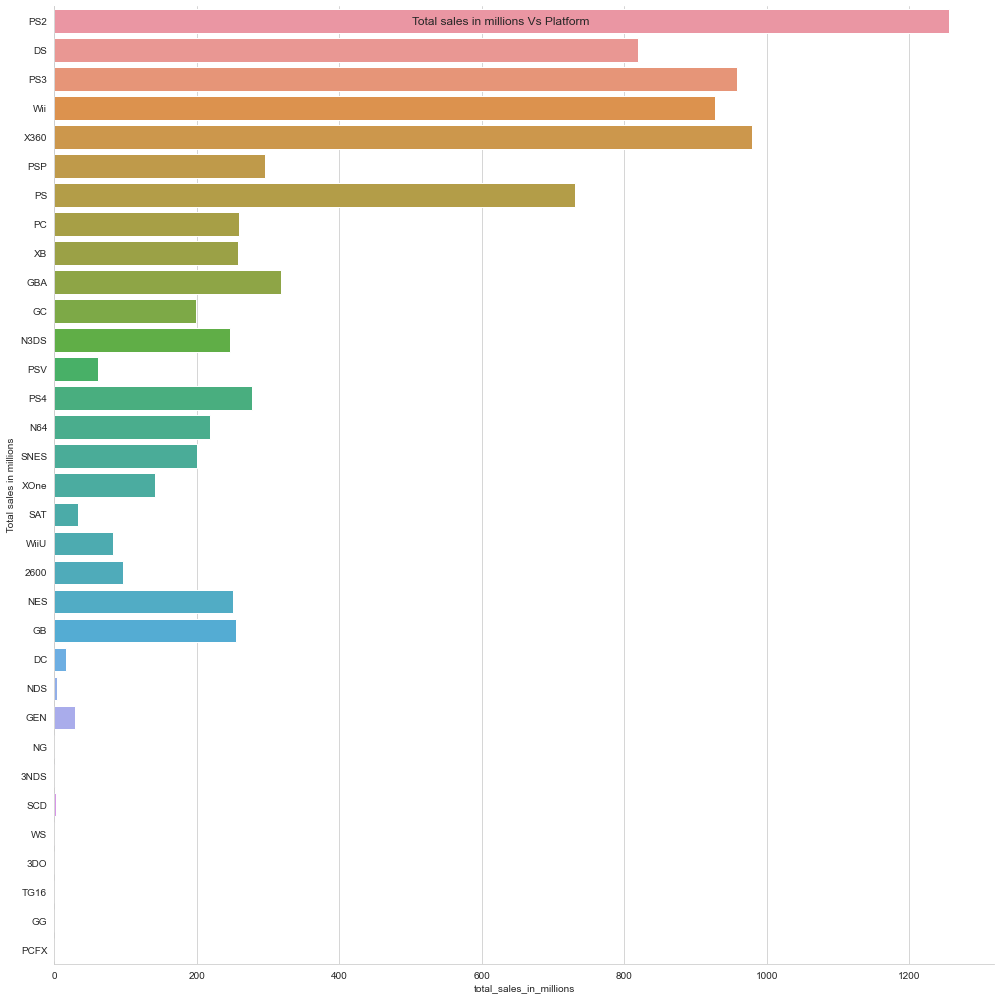

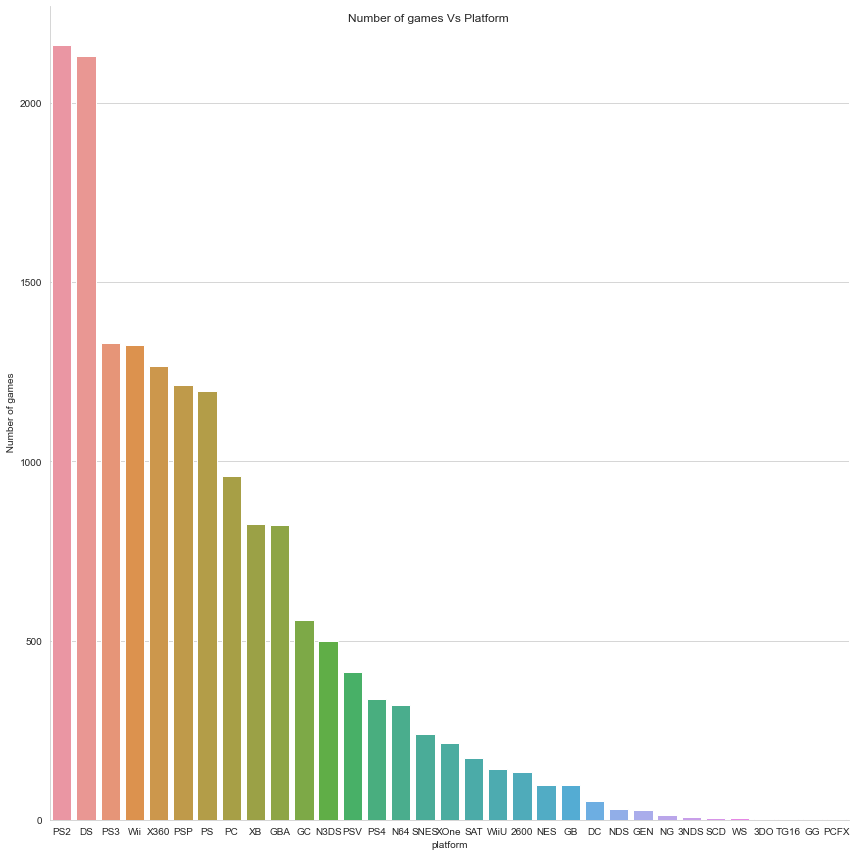

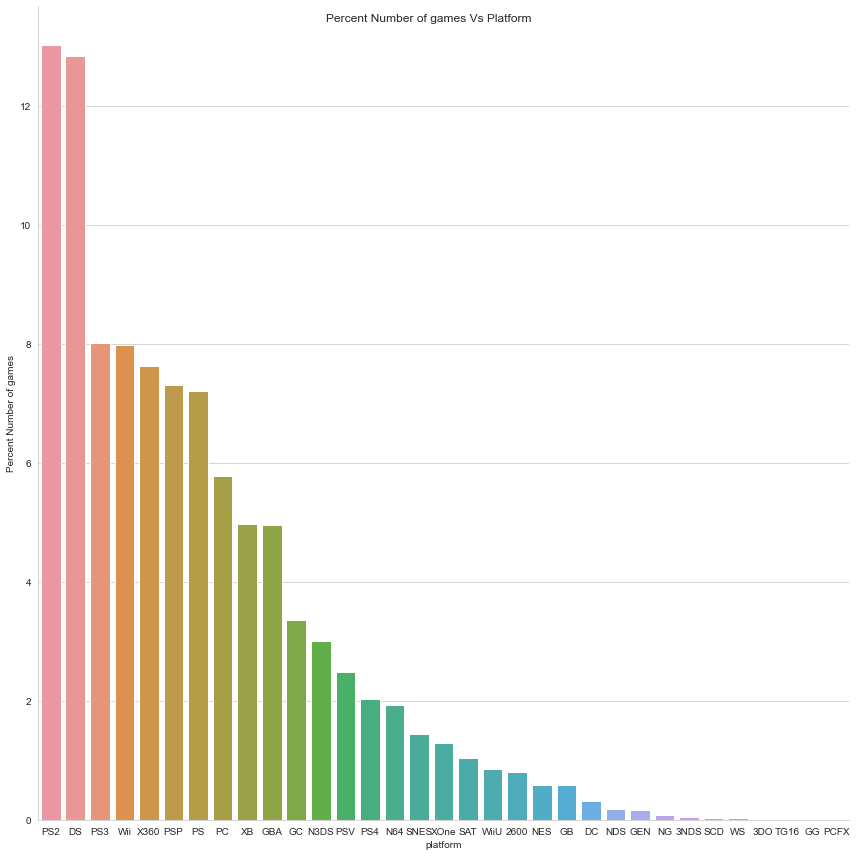

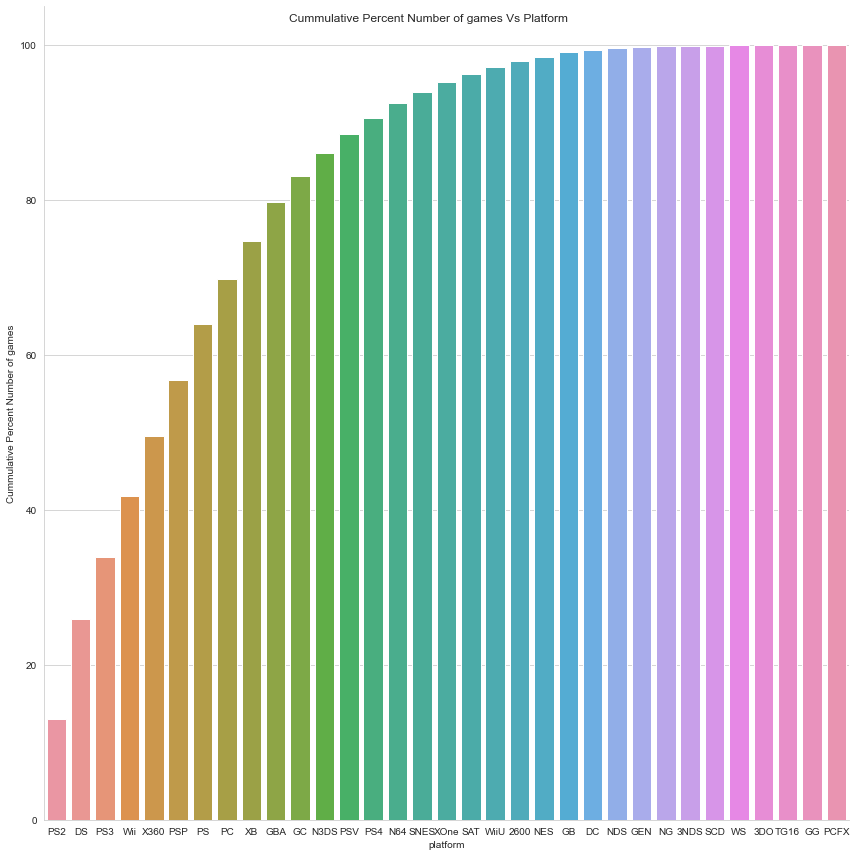

In [172]:
#PLATFORMS
#Making all the required Visualizations using matplotlib
#vgsales_plat2.sort_values('total_sales_in_millions', ascending = False).plot(x = 'platform', y = 'total_sales_in_millions', kind = "bar", title = 'Total Sales VS Platforms', figsize=(10, 10))
#vgsales_plat2.plot(x = 'platform', y = 'num_of_games', kind = "bar", title = 'No. of Games VS Platforms', figsize=(10, 10))
#vgsales_plat2.plot(x = 'platform', y = 'percent_num_of_games', kind = "bar", title = 'Percent No. of Games VS Platforms', figsize=(10, 10))
#vgsales_plat2.plot(x = 'platform', y = 'cumm_perc_num_of_games', kind = "bar", title = 'Cummulative Percentage VS Platforms', figsize=(10, 10))

#Making all the required Visualizations using seaborn
#Total sales in millions Vs Platform
sns.set_style("whitegrid")
a =sns.catplot(y="platform", x="total_sales_in_millions", kind="bar", data=vgsales_plat2, height=14)
a.fig.suptitle("Total sales in millions Vs Platform")
a.set(ylabel= " Total sales in millions")

#Number of games Vs Platform 
b= sns.catplot(x = 'platform', y = 'num_of_games',kind="bar", data=vgsales_plat2, height=12)
b.fig.suptitle("Number of games Vs Platform")
b.set(ylabel= " Number of games")

#Percent Number of games vs Platform
c= sns.catplot(x = 'platform', y = 'percent_num_of_games',kind="bar", data=vgsales_plat2, height=12)
c.fig.suptitle("Percent Number of games Vs Platform")
c.set(ylabel= "Percent Number of games")

#cummulative percent of numbers vs Platform
d = sns.catplot(x = 'platform', y = 'cumm_perc_num_of_games',kind="bar", data=vgsales_plat2, height=12)
d.fig.suptitle("Cummulative Percent Number of games Vs Platform")
d.set(ylabel= "Cummulative Percent Number of games")

In [173]:
vgsales_year1 = vgsales.groupby('year').agg({'total_sales':'sum', 'name': 'count'})
vgsales_year= vgsales_year1.rename(columns={'total_sales': 'total_sales_in_millions', 'name' : 'num_of_games'}).reset_index()

 #Add Percentage statistic and Cummulative Percentage
vgsales_year["percent_num_of_games"] = vgsales_year["num_of_games"]/vgsales_year['num_of_games'].sum()*100
vgsales_year["cumm_perc_num_of_games"] =vgsales_year["percent_num_of_games"].cumsum()

#Resetting the Index from YEAR and making Year values from Float to Integer
vgsales_year.reset_index()
vgsales_year['year'] = vgsales_year['year'].astype(int)
vgsales_year

,year,total_sales_in_millions,num_of_games,percent_num_of_games,cumm_perc_num_of_games
0,1977,1.25,2,0.012051,0.012051
1,1978,4.89,8,0.048204,0.060255
2,1979,0.31,1,0.006026,0.066281
3,1980,13.51,12,0.072307,0.138588
4,1981,35.77,46,0.277175,0.415763
5,1982,30.58,38,0.228971,0.644734
6,1983,16.79,17,0.102434,0.747168
7,1984,50.39,15,0.090383,0.837551
8,1985,53.94,14,0.084358,0.921909
9,1986,37.07,21,0.126537,1.048445


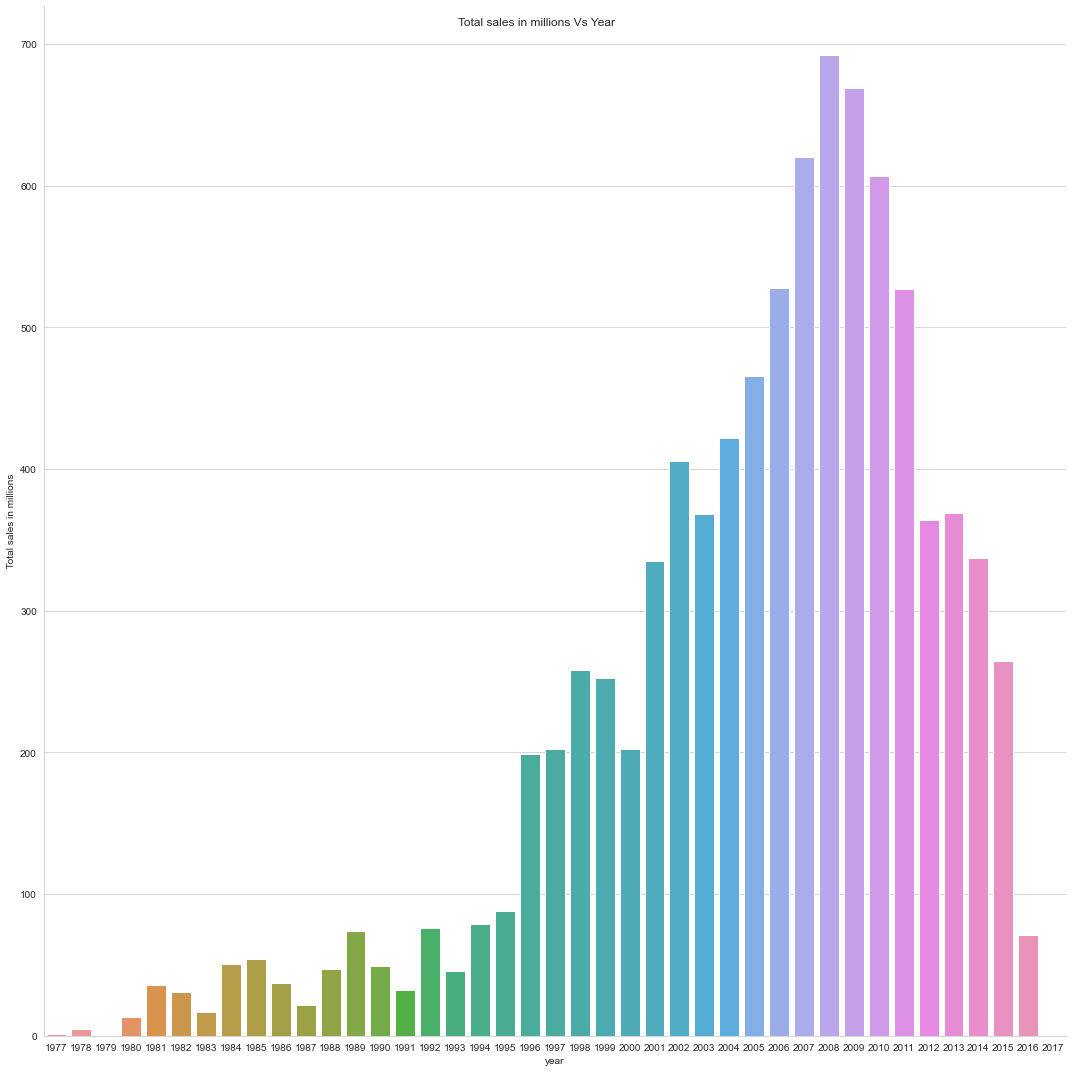

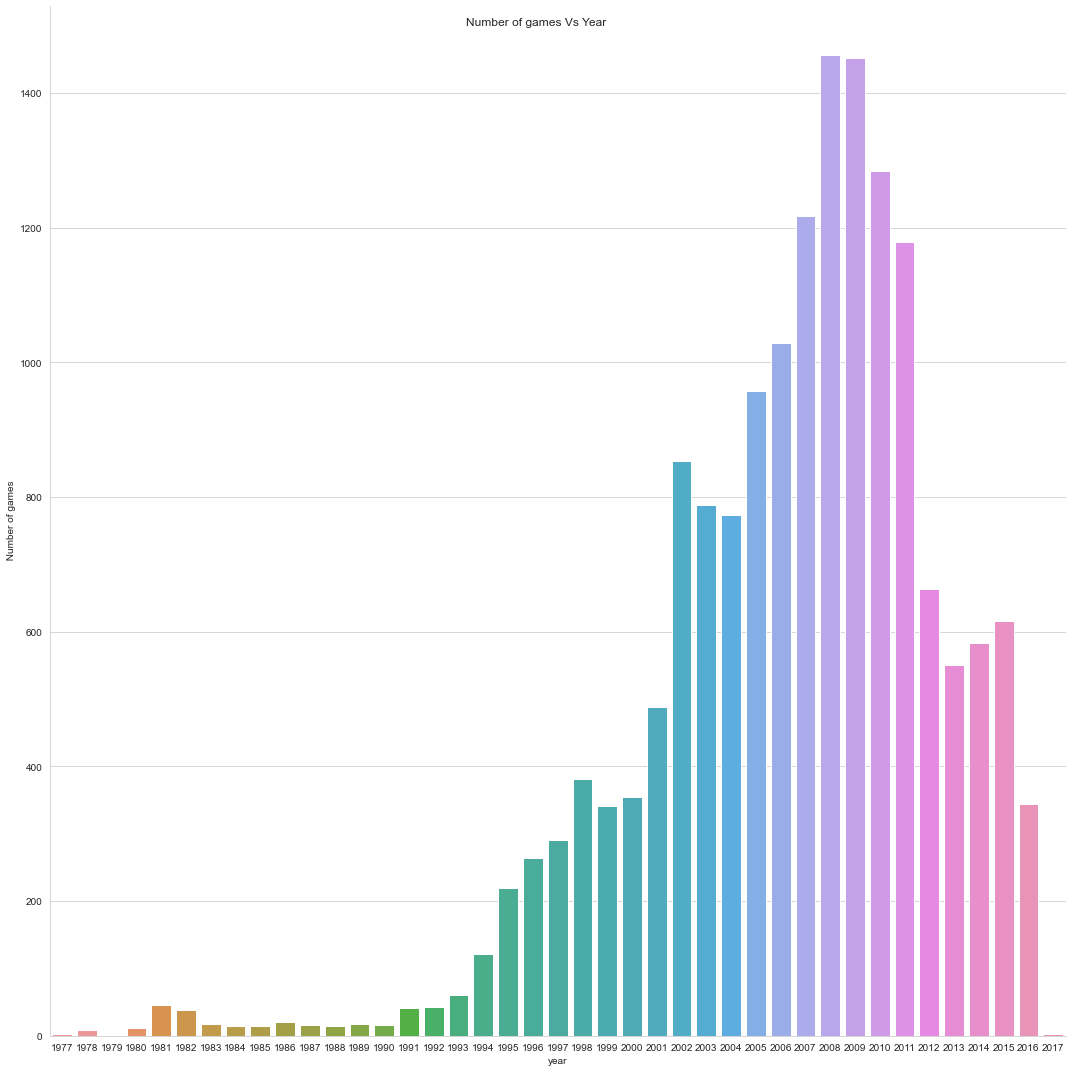

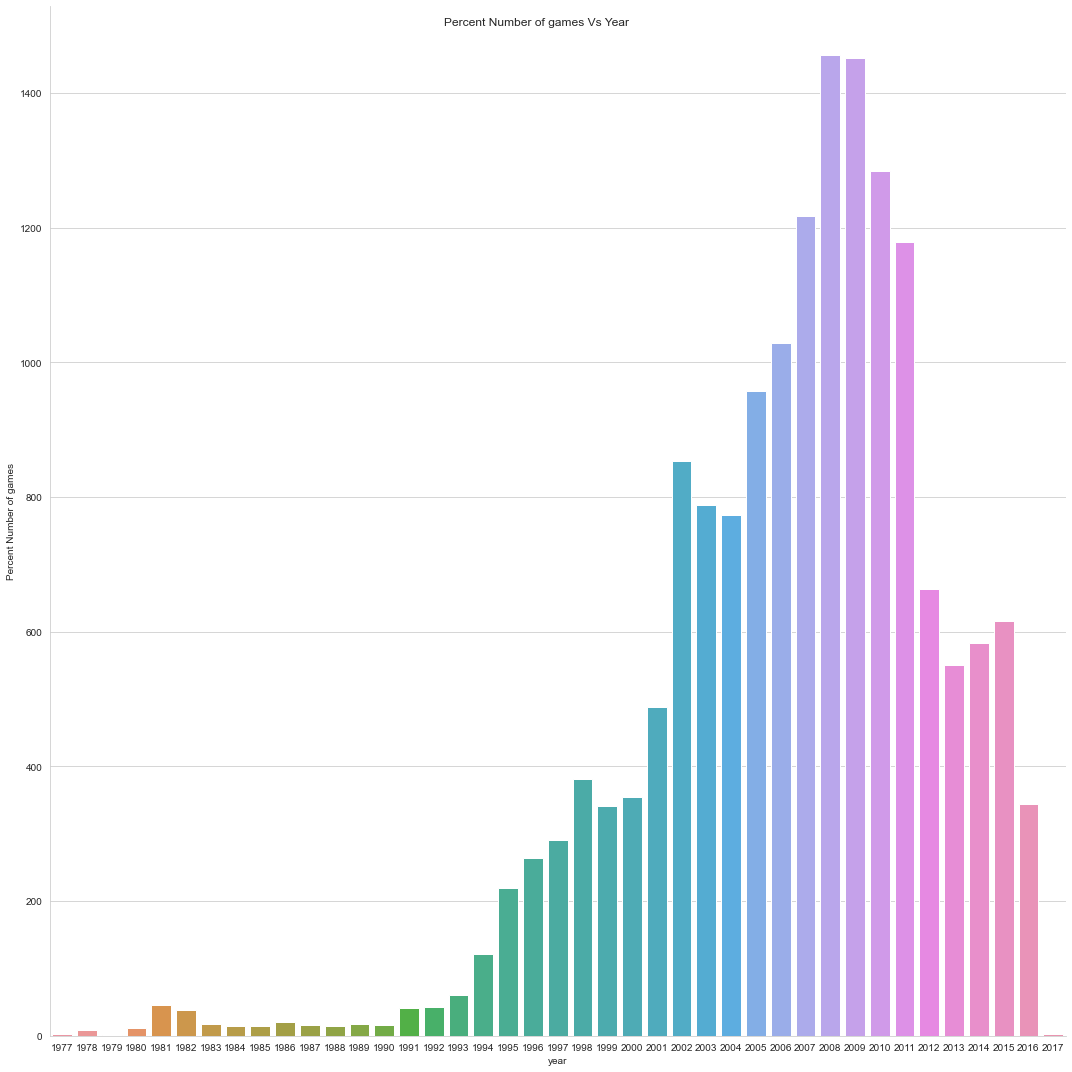

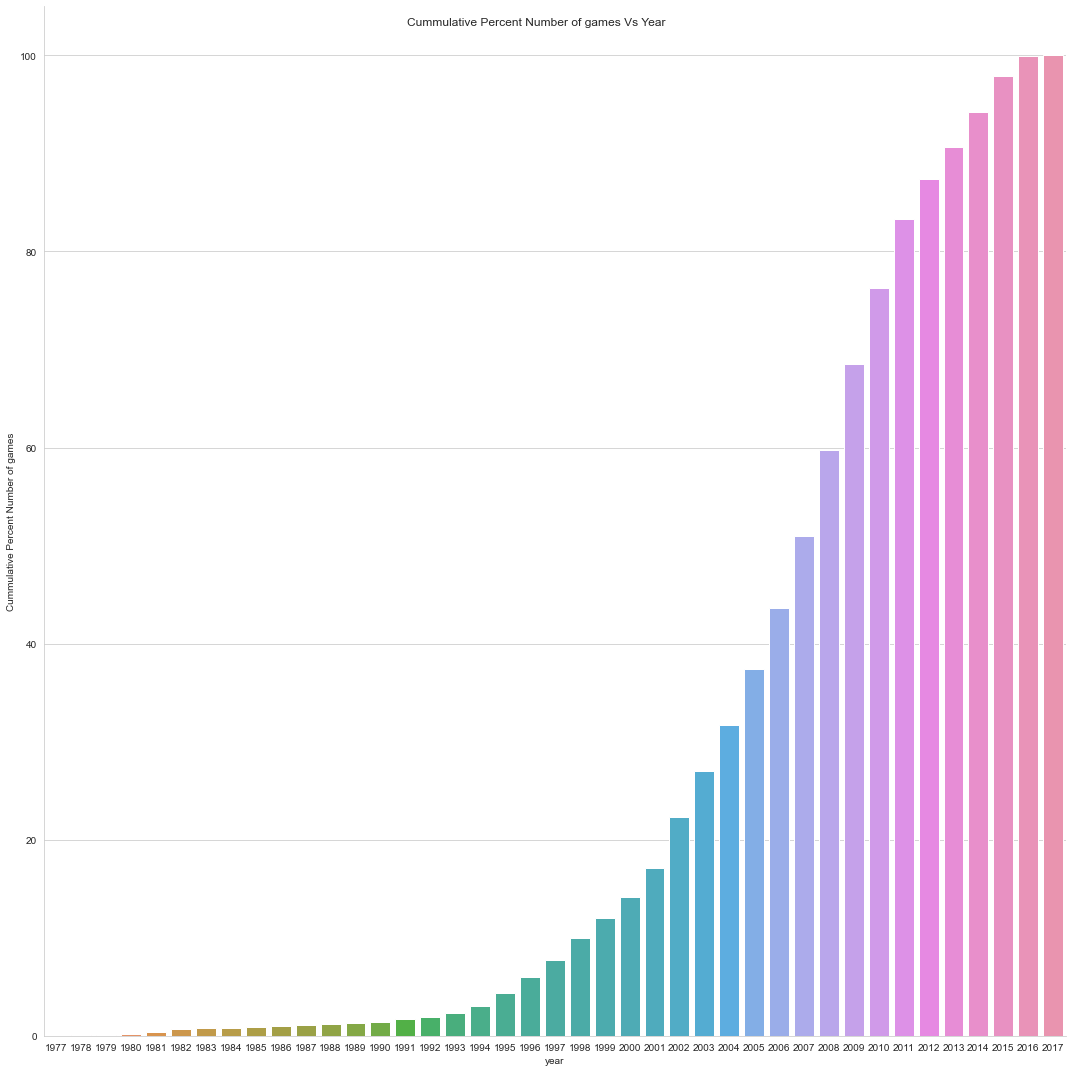

In [174]:
#Making all the required Visualizations for YEARS
#vgsales_year.plot(x = 'year', y = 'total_sales_in_millions', kind = "bar", title = 'Total Sales VS Year', figsize=(10, 10))
#vgsales_year.plot(x = 'year', y = 'num_of_games', kind = "bar", title = 'No. of Games VS Year', figsize=(10, 10))
#vgsales_year.plot(x = 'year', y = 'percent_num_of_games', kind = "bar", title = 'Percent No. of Games VS Year', figsize=(10, 10))
#vgsales_year.plot(x = 'year', y = 'cumm_num_of_games', kind = "bar", title = 'Cummulative Percentage VS Year', figsize=(10, 10))


#Total sales in millions Vs Platform
sns.set_style("whitegrid")
e =sns.catplot(x="year", y="total_sales_in_millions", kind="bar", data=vgsales_year,height=15)
e.fig.suptitle("Total sales in millions Vs Year")
e.set(ylabel= " Total sales in millions")

#Number of games Vs Platform 
f= sns.catplot(x="year", y = 'num_of_games',kind="bar", data=vgsales_year,height=15)
f.fig.suptitle("Number of games Vs Year")
f.set(ylabel= " Number of games")

#Percent Number of games vs Platform
g= sns.catplot(x="year", y = 'num_of_games',kind="bar", data=vgsales_year,height=15)
g.fig.suptitle("Percent Number of games Vs Year")
g.set(ylabel= "Percent Number of games")

#cummulative percent of numbers vs Platform
h = sns.catplot(x="year", y = 'cumm_perc_num_of_games',kind="bar", data=vgsales_year,height=15)
h.fig.suptitle("Cummulative Percent Number of games Vs Year")
h.set(ylabel= "Cummulative Percent Number of games")



In [175]:
vgsales_genre1 = vgsales.groupby('genre').agg({'total_sales':'sum', 'name': 'count'})
vgsales_genre= vgsales_genre1.rename(columns={'total_sales': 'total_sales_in_millions', 'name' : 'num_of_games'}).reset_index()

 #Add Percentage statistic and Cummulative Percentage
vgsales_genre["percent_num_of_games"] = vgsales_genre["num_of_games"]/vgsales_genre['num_of_games'].sum()*100
#SORT
vgsales_genre1 = vgsales_genre.sort_values("percent_num_of_games", ascending = False)

#Cummulative percentage
vgsales_genre1["cumm_perc_num_of_games"] = vgsales_genre1["percent_num_of_games"].cumsum()
#Resetting the Index from Genre 
vgsales_genre1.reset_index(drop = True)

,genre,total_sales_in_millions,num_of_games,percent_num_of_games,cumm_perc_num_of_games
0,Action,1751.14,3315,19.974693,19.974693
1,Sports,1330.93,2346,14.135936,34.110629
2,Misc,809.96,1739,10.478429,44.589058
3,Role-Playing,927.37,1488,8.966016,53.555074
4,Shooter,1037.37,1310,7.893468,61.448542
5,Adventure,239.04,1286,7.748855,69.197397
6,Racing,732.04,1249,7.525910,76.723307
7,Platform,831.37,886,5.338636,82.061943
8,Simulation,391.91,866,5.218125,87.280067
9,Fighting,448.91,848,5.109665,92.389732


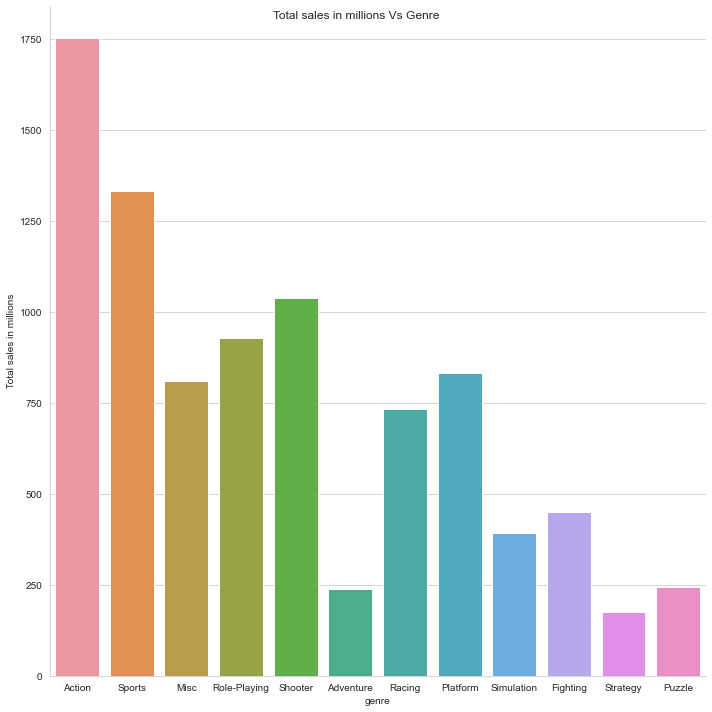

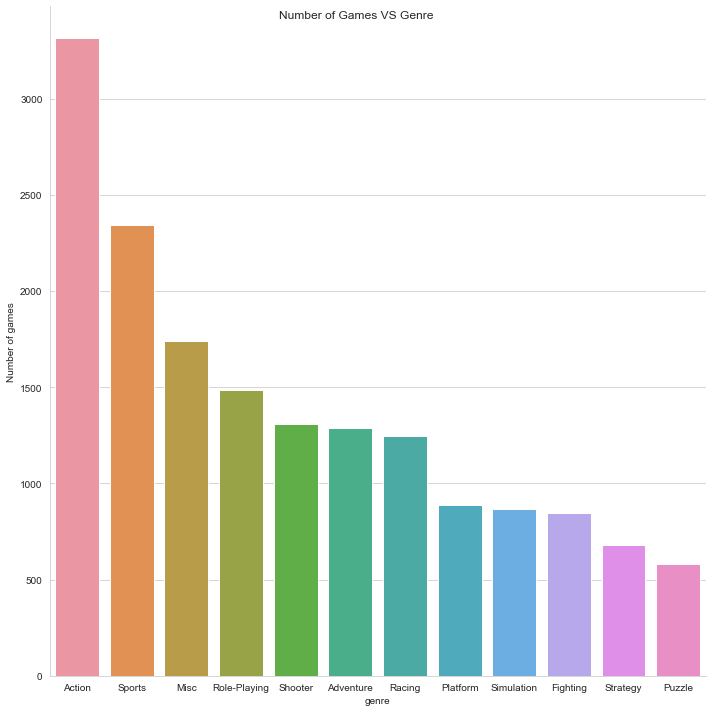

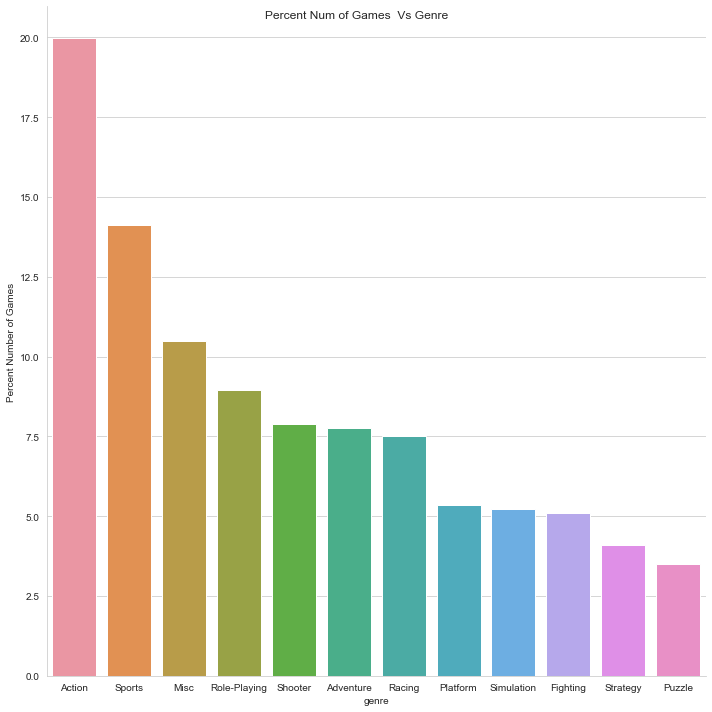

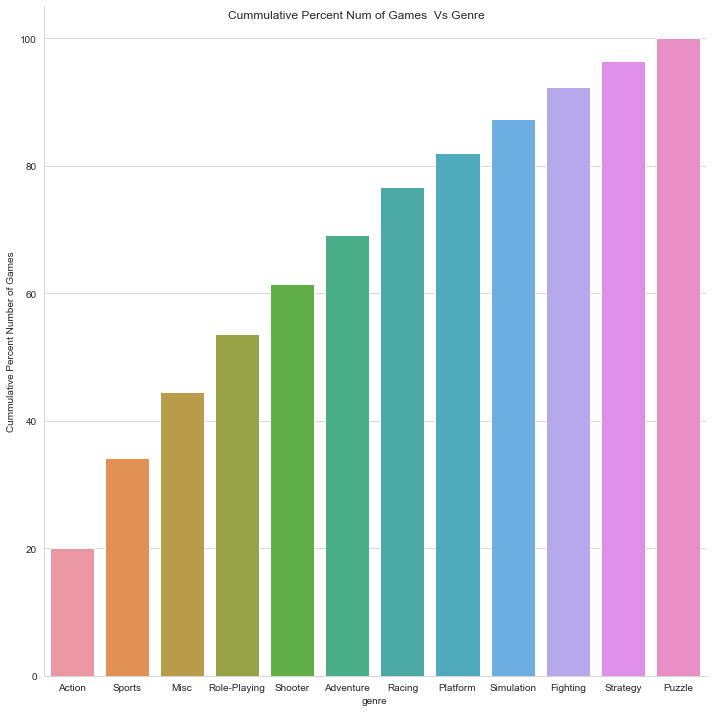

In [176]:
#Making all the required Visualizations using seaborn

sns.set_style("whitegrid")
k =sns.catplot(x="genre", y="total_sales_in_millions", kind="bar", data=vgsales_genre1, height=10)
k.fig.suptitle("Total sales in millions Vs Genre")
k.set(ylabel= " Total sales in millions")

# for count of games sold by genre
#plt.figure(figsize=(12,6))
l = sns.catplot(x="genre", y="num_of_games", kind="bar", data=vgsales_genre1, height =10)
l.fig.suptitle("Number of Games VS Genre")
l.set(ylabel= "Number of games")

#Perc No of Games vs Genre
m= sns.catplot(x = "genre", y="percent_num_of_games", data=vgsales_genre1, kind="bar", height=10)
m.fig.suptitle("Percent Num of Games  Vs Genre")
m.set(ylabel= "Percent Number of Games")

#Cummulative No. of games vs Genre
n= sns.catplot(x = "genre", y="cumm_perc_num_of_games", data=vgsales_genre1, kind="bar", height=10)
n.fig.suptitle("Cummulative Percent Num of Games  Vs Genre")
n.set(ylabel= "Cummulative Percent Number of Games")

      
#vgsales_genre1.sort_values('total_sales_in_millions', ascending = False).plot(x = 'genre', y = 'total_sales_in_millions', kind = "bar", title = 'Total Sales VS Genre', figsize=(10, 10))
#vgsales_genre1.plot(x = 'genre', y = 'num_of_games', kind = "bar", title = 'No. of Games VS Genre', figsize=(10, 10))
#vgsales_genre1.plot(x = 'genre', y = 'percent_num_of_games', kind = "bar", title = 'Percent No. of Games VS Genre', figsize=(10, 10))
#vgsales_genre1.plot(x = 'genre', y = 'cumm_perc_num_of_games', kind = "bar", title = 'Cummulative Percentage VS Genre', figsize=(10, 10))


<AxesSubplot:title={'center':'Mean Global Sales of Video Games by Genre'}, xlabel='total_sales', ylabel='genre'>

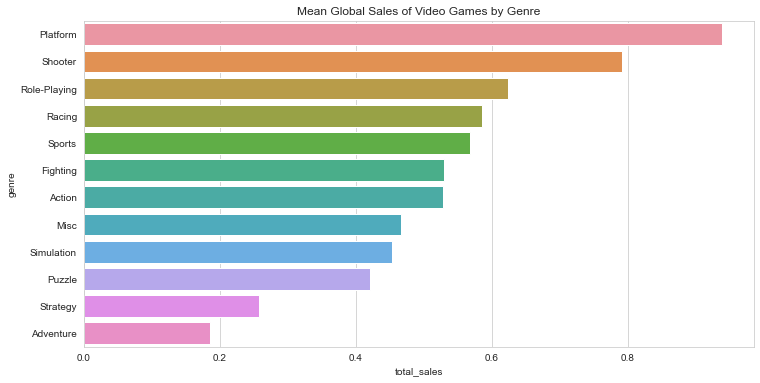

In [177]:
# Mean sales by genre
genresales_mean = vgsales.groupby('genre',as_index=False).mean()
plt.figure(figsize=(12,6))
plt.title("Mean Global Sales of Video Games by Genre")
sns.barplot(data = genresales_mean.sort_values("total_sales",ascending=False), x='total_sales', y='genre')

<AxesSubplot:title={'center':'Number of Video Games occurring in top 100 best selling games'}, xlabel='count', ylabel='genre'>

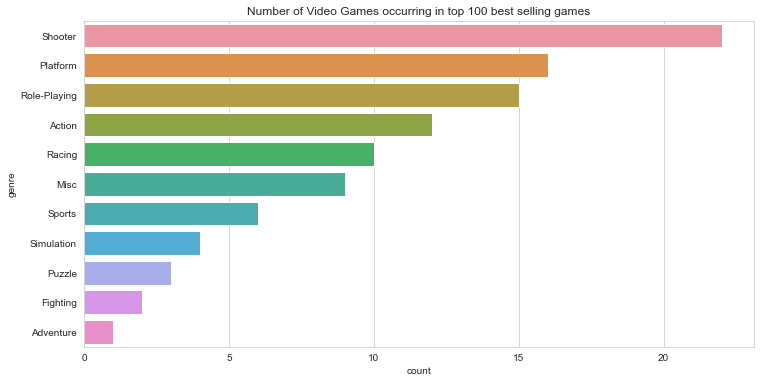

In [178]:
#top hundred most selling games
top_hundred_data = vgsales.sort_values('total_sales', ascending=False)[:100]

plt.figure(figsize=(12,6))
plt.title("Number of Video Games occurring in top 100 best selling games")
sns.countplot(y='genre', data=top_hundred_data, order=top_hundred_data.genre.value_counts().index)

<AxesSubplot:xlabel='platform', ylabel='genre'>

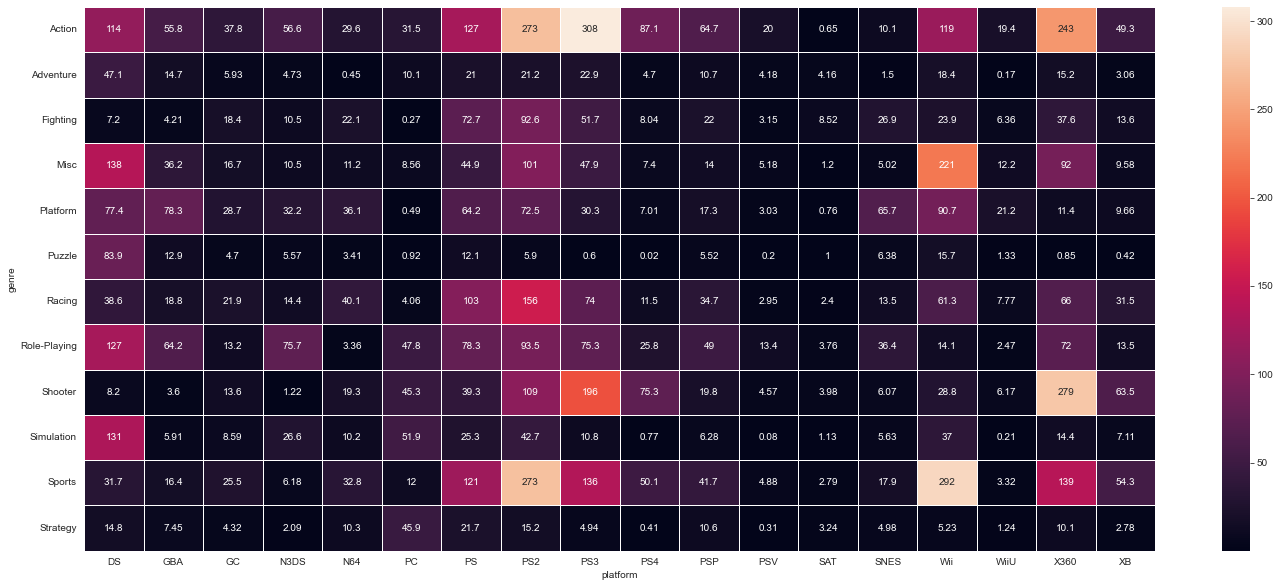

In [179]:
#Do certain genre sell more on certain consoles.
#using a heatmap we can make that calculation. for sum
plt.figure(figsize=(24,10))
m = pd.crosstab(vgsales["genre"],vgsales["platform"],values=vgsales["total_sales"],aggfunc=np.sum).dropna(axis=1)
sns.heatmap(m, annot=True,fmt=".3g", linewidths=1)

<AxesSubplot:xlabel='platform', ylabel='genre'>

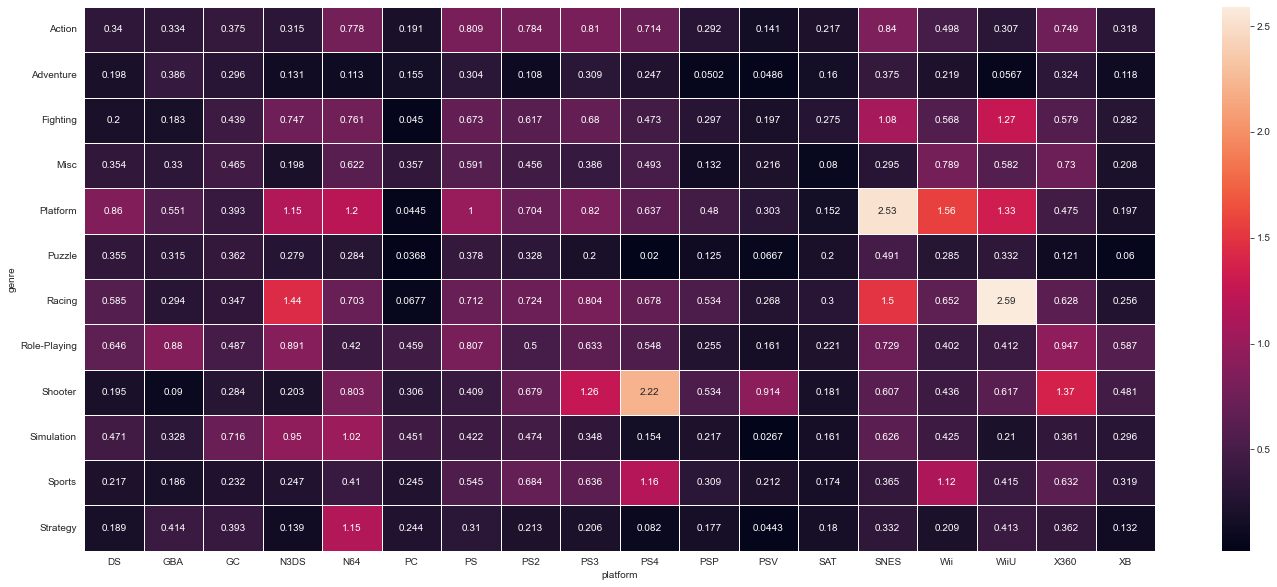

In [180]:
#using a heatmap we can make that calculation. for mean
plt.figure(figsize=(24,10))
m = pd.crosstab(vgsales["genre"],vgsales["platform"],values=vgsales["total_sales"],aggfunc=np.mean).dropna(axis=1)
sns.heatmap(m, annot=True,fmt=".3g", linewidths=1)

In [181]:
vgsales_pub1 = vgsales.groupby('publisher').agg({'total_sales':'sum', 'name': 'count'})
vgsales_pub = vgsales_pub1.rename(columns={'total_sales': 'total_sales_in_millions', 'name' : 'num_of_games'}).reset_index()

 #Add Percentage statistic and Cummulative Percentage
vgsales_pub["percent_num_of_games"] = vgsales_pub["num_of_games"]/vgsales_pub['num_of_games'].sum()*100

#Sorting the values in according to Percentage in Descending order
vgsales_pub2 = vgsales_pub.sort_values("percent_num_of_games", ascending = False)

#Cummulative Percentage
vgsales_pub2["cumm_perc_num_of_games"] = vgsales_pub2["percent_num_of_games"].cumsum()

#Resetting the Index from YEAR
vgsales_pub2.reset_index() 

#Selecting only first 17 Publishers whose sales are almost 100 millions or above
vgsales_pubfinal= vgsales_pub2.head(17)

vgsales_pubfinal.reset_index(drop = True) 

,publisher,total_sales_in_millions,num_of_games,percent_num_of_games,cumm_perc_num_of_games
0,Electronic Arts,1114.07,1356,8.170644,8.170644
1,Activision,728.14,978,5.892986,14.063630
2,Bandai Namco Games,255.85,939,5.657990,19.721620
3,Ubisoft,475.13,928,5.591709,25.313329
4,Konami Digital Entertainment,284.17,835,5.031333,30.344661
5,THQ,344.25,718,4.326344,34.671005
6,Sony Computer Entertainment,638.10,715,4.308267,38.979272
7,Nintendo,1789.45,712,4.290190,43.269463
8,Sega,273.54,643,3.874428,47.143890
9,Take-Two Interactive,400.64,416,2.506628,49.650518


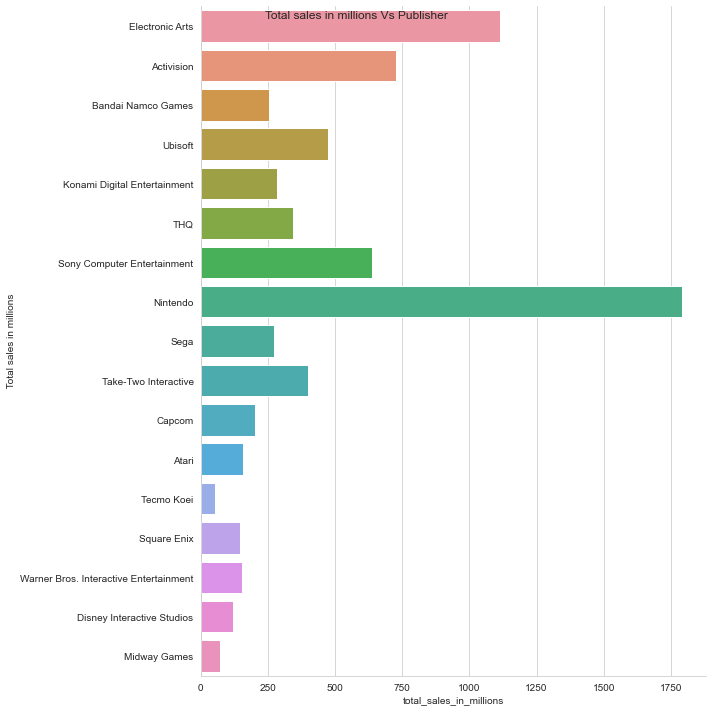

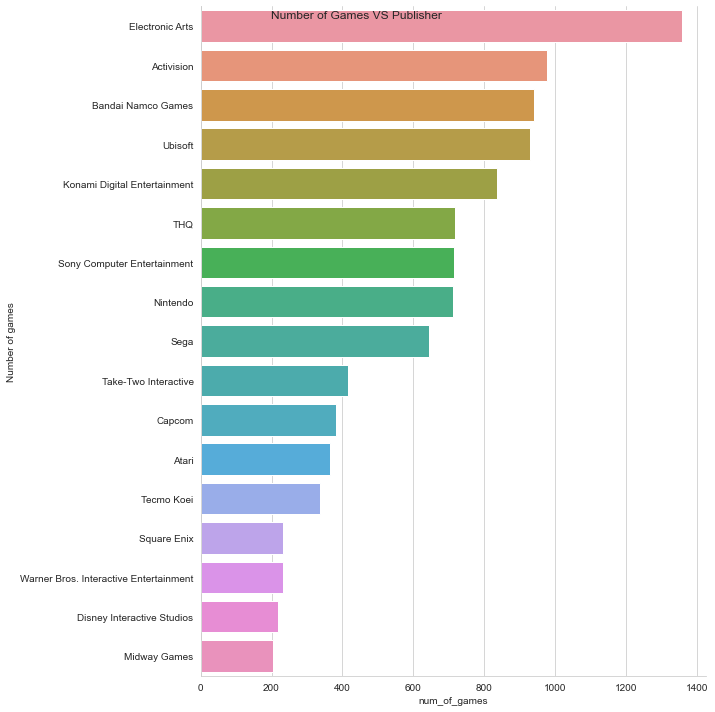

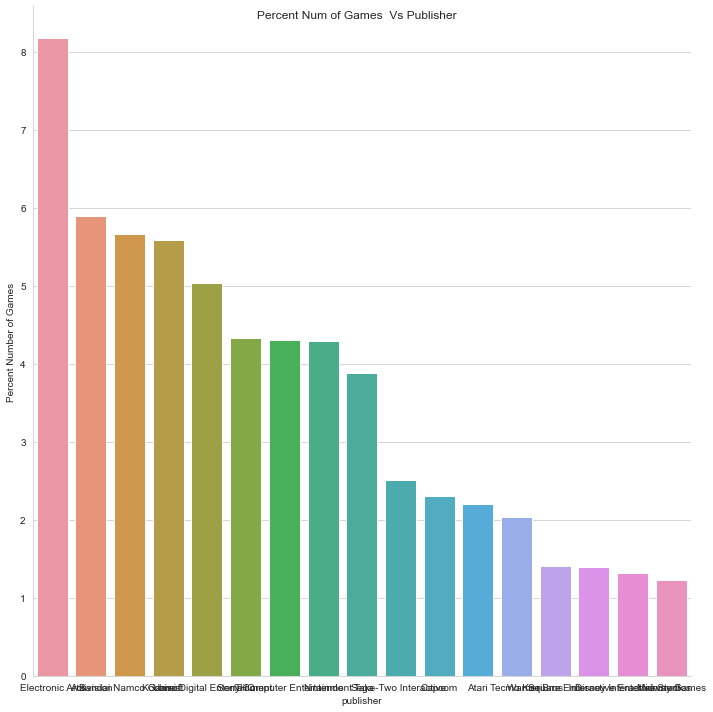

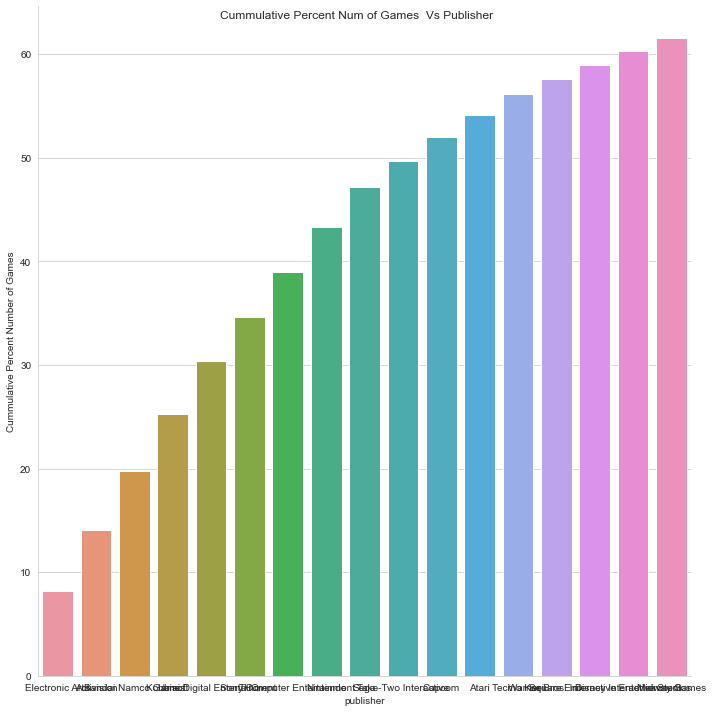

In [182]:
#using matplotlib for Graph plots. PUBLISHER
#vgsales_pubfinal.sort_values('total_sales_in_millions', ascending = False).plot(x = 'publisher', y = 'total_sales_in_millions', kind = "bar", title = 'Total Sales VS Publisher', figsize=(10, 10))
#vgsales_pubfinal.plot(x = 'publisher', y = 'num_of_games', kind = "bar", title = 'No. of Games VS Publisher', figsize=(10, 10))
#vgsales_pubfinal.plot(x = 'publisher', y = 'percent_num_of_games', kind = "bar", title = 'Percent No. of Games VS Publisher', figsize=(10, 10))
#vgsales_pubfinal.plot(x = 'publisher', y = 'cumm_perc_num_of_games', kind = "bar", title = 'Cummulative Percentage VS Publisher', figsize=(10, 10))

#Making all the required Visualizations WITH SEABORN


sns.set_style("whitegrid")
p =sns.catplot(y="publisher", x="total_sales_in_millions", kind="bar", data=vgsales_pubfinal, height=10)
p.fig.suptitle("Total sales in millions Vs Publisher")
p.set(ylabel= " Total sales in millions")

# for count of games sold by genre
#plt.figure(figsize=(12,6))
q = sns.catplot(y="publisher", x="num_of_games", kind="bar", data=vgsales_pubfinal, height =10)
q.fig.suptitle("Number of Games VS Publisher")
q.set(ylabel= "Number of games")

#Perc No of Games vs Genre
r= sns.catplot(x = "publisher", y="percent_num_of_games", data=vgsales_pubfinal, kind="bar", height=10)
r.fig.suptitle("Percent Num of Games  Vs Publisher")
r.set(ylabel= "Percent Number of Games")

#Cummulative No. of games vs Genre
s= sns.catplot(x = "publisher", y="cumm_perc_num_of_games", data=vgsales_pubfinal, kind="bar", height=10)
s.fig.suptitle("Cummulative Percent Num of Games  Vs Publisher")
s.set(ylabel= "Cummulative Percent Number of Games")

In [183]:
#TOTAL SUMS OF GLOBAL/Total SALES 
total_global_sales = vgsales["total_sales"].sum()
sum_total_sales = round(total_global_sales,2)

#mean of total sales
mean_total_sales = round(vgsales["total_sales"].mean(), 2)

#median of total sales 
median_total_sales =  round(vgsales["total_sales"].median(), 2)

In [184]:
# Total sales BY NA SALES
total_na_sales = vgsales["na_sales"].sum()
sum_na_sales = round(total_na_sales,2)

#mean of NA sales
mean_na_sales = round(vgsales["na_sales"].mean(), 2)

#median of NA sales 
median_na_sales =  round(vgsales["na_sales"].median(), 2)


In [185]:
# Total sales BY EU SALES
total_eu_sales = vgsales["eu_sales"].sum()
sum_eu_sales = round(total_eu_sales,2)

#mean of EU sales
mean_eu_sales = round(vgsales["eu_sales"].mean(), 2)

#median of EU sales 
median_eu_sales =  round(vgsales["eu_sales"].median(), 2)

In [186]:
# Total sales BY JP SALES
total_jp_Sales = vgsales["jp_sales"].sum()
sum_jp_sales = round(total_jp_Sales,2)

#mean of JP sales
mean_jp_sales = round(vgsales["jp_sales"].mean(), 2)

#median of JP sales 
median_jp_sales =  round(vgsales["jp_sales"].median(), 2)

In [187]:
# Total sales BY Other SALES
total_other_Sales = vgsales["other_sales"].sum()
sum_other_sales = round(total_other_Sales,2)

#mean of JP sales
mean_other_sales = round(vgsales["other_sales"].mean(), 2)

#median of JP sales 
median_other_sales =  round(vgsales["other_sales"].median(), 2)

In [188]:
#Total sales of all video games by region
total_sales_in_million = {"NA Sales": sum_na_sales, "EU Sales": sum_eu_sales, "JP Sales": sum_jp_sales, "Other Sales": sum_other_sales, "Global Sales" :sum_total_sales}
sum_sales = pd.DataFrame(total_sales_in_million, index=["Total Sales in Million"]).T
sum_sales


,Total Sales in Million
NA Sales,4392.68
EU Sales,2434.13
JP Sales,1290.98
Other Sales,797.73
Global Sales,8920.11


In [189]:
# Mean sales all video games by region
mean_region = {"NA Sales": mean_na_sales, "EU Sales": mean_eu_sales, "JP Sales": mean_jp_sales, "Other Sales": mean_other_sales ,"Total Sales": mean_total_sales }
mean_by_region = pd.DataFrame(mean_region, index = ["Mean Sales in Million"]).T
mean_by_region

,Mean Sales in Million
NA Sales,0.26
EU Sales,0.15
JP Sales,0.08
Other Sales,0.05
Total Sales,0.54


In [190]:
# Median sales all video games by region
median_region = {"NA Sales": median_na_sales, "EU Sales": median_eu_sales, "JP Sales": median_jp_sales, "Other Sales": median_other_sales ,"Total Sales": median_total_sales }
median_by_region = pd.DataFrame(median_region, index = ["Median Sales by Region"]).T
median_by_region

,Median Sales by Region
NA Sales,0.08
EU Sales,0.02
JP Sales,0.00
Other Sales,0.01
Total Sales,0.17


<AxesSubplot:title={'center':'Heatmap of Genre and Platform with Total Sales'}, xlabel='platform', ylabel='genre'>

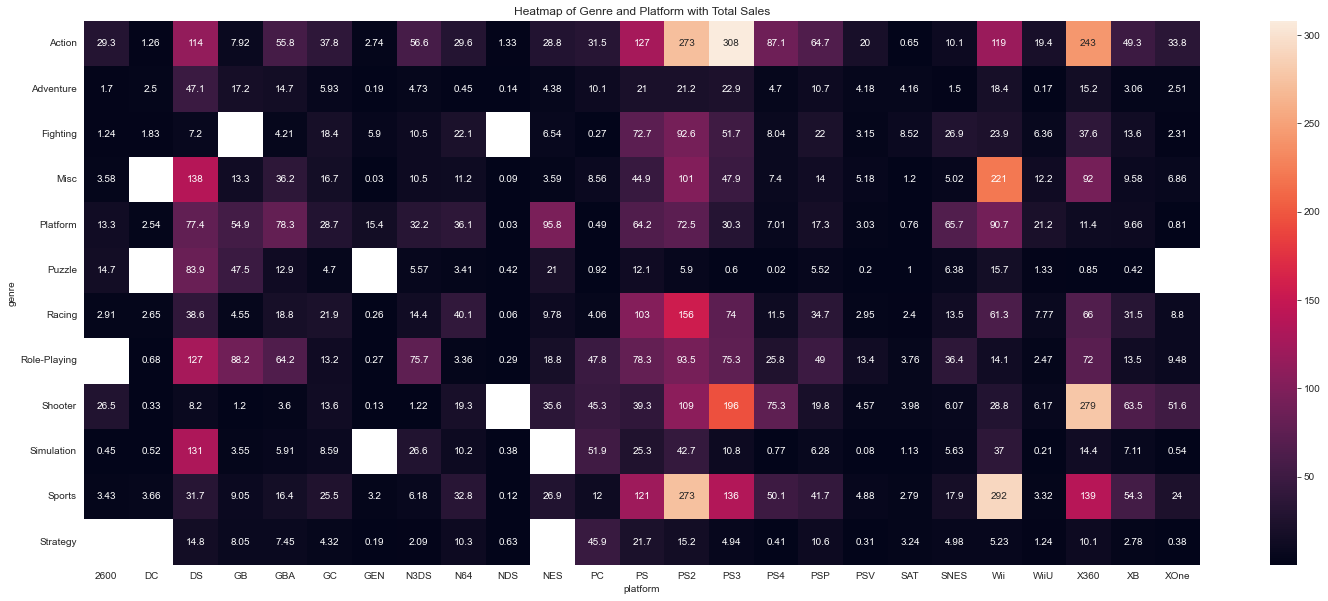

In [193]:
#DOES REGION EFFECT SALES?
global_sales_genre_platform = vgsales.pivot_table(index='genre', columns='platform', values='total_sales', aggfunc=np.sum).dropna(axis=1, thresh=9)
global_sales_mean_genre_platform = vgsales.pivot_table(index='genre', columns='platform', values='total_sales', aggfunc=np.mean).dropna(axis=1, thresh=9)
# Heat map of genres & platform
plt.figure(figsize=(25,10))
plt.title("Heatmap of Genre and Platform with Total Sales")

sns.heatmap(data=global_sales_genre_platform, annot=True, fmt=".3g")

In [194]:
vgsales[['name', "eu_sales", "jp_sales","other_sales" ,"total_sales"]].head(10)

,name,eu_sales,jp_sales,other_sales,total_sales
0,Wii Sports,29.02,3.77,8.46,82.74
1,Super Mario Bros.,3.58,6.81,0.77,40.24
2,Mario Kart Wii,12.88,3.79,3.31,35.82
3,Wii Sports Resort,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,8.89,10.22,1.00,31.37
5,Tetris,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,9.23,6.50,2.90,30.01
7,Wii Play,9.20,2.93,2.85,29.02
8,New Super Mario Bros. Wii,7.06,4.70,2.26,28.62
9,Duck Hunt,0.63,0.28,0.47,28.31


In [195]:
freq_dist = {'region':["NA", "EU", "JP", "Other", "Global"],
             'total_sales_in million' :[sum_na_sales, sum_eu_sales, sum_jp_sales, sum_other_sales,sum_total_sales],
             'mean_sales_in_million' : [mean_na_sales, mean_eu_sales, mean_jp_sales,mean_other_sales ,mean_total_sales],
             'median_sales_in_million':[median_na_sales, median_eu_sales, median_jp_sales, median_other_sales ,median_total_sales]}
final_dist = pd.DataFrame(freq_dist)
final_dist

,region,total_sales_in million,mean_sales_in_million,median_sales_in_million
0,NA,4392.68,0.26,0.08
1,EU,2434.13,0.15,0.02
2,JP,1290.98,0.08,0.00
3,Other,797.73,0.05,0.01
4,Global,8920.11,0.54,0.17


In [ ]:
#Making a pivot table for Mean/AVG of ALL VIDEO GAMES
# vgsales_mean = vgsales_lower.pivot_table(values = "total_sales", index = "Name", aggfunc = np.mean)
# vgsales_mean

In [ ]:
#Making a pivot table for Mean/AVG of ALL VIDEO GAMES by region
# vgsales_mean = vgsales_lower.pivot_table(values = ["na_sales", "eu_sales", "jp_sales","other_sales"], index = "Name", aggfunc = np.mean)
# vgsales_mean

In [197]:
#Percentage North American Sales
percent_na_sales = round(((sum_na_sales/sum_total_sales)*100),2)

#Percentage European Sales
percent_eu_sales = round(((sum_eu_sales/sum_total_sales)*100),2)

#Percentage Japaneese Sales
percent_jp_sales = round(((sum_jp_sales/sum_total_sales)*100),2)

#Percentage other sales
percent_other_sales = round(((sum_other_sales/sum_total_sales)*100),2)

#Putting all values in a dataframe
percent_region = {"NA Sales": percent_na_sales, "EU Sales": percent_eu_sales, "JP Sales": percent_jp_sales, "Other Sales": percent_other_sales}
percent_by_region = pd.DataFrame(percent_region, index = ["Percent per Total Sales"]).T # Transposing rows to columns
percent_by_region

,Percent per Total Sales
NA Sales,49.24
EU Sales,27.29
JP Sales,14.47
Other Sales,8.94


In [198]:
# vgsales_lower.loc[:,['Name', 'Platform', 'perctage_contribution_in_total_sales', 'perctage_contribution_in_na_sales', 'perctage_contribution_in_eu_sales']].head(5)

In [200]:
vgsales['percentage_na_sales'] = (vgsales['na_sales']/vgsales['na_sales'].sum()) * 100
vgsales['percentage_eu_sales'] = (vgsales['eu_sales']/vgsales['eu_sales'].sum()) * 100
vgsales['percentage_jp_sales'] = (vgsales['jp_sales']/vgsales['jp_sales'].sum()) * 100
vgsales['percentage_other_sales'] = (vgsales['other_sales']/vgsales['other_sales'].sum()) * 100
vgsales['percentage_total_sales'] = (vgsales['total_sales']/vgsales['total_sales'].sum()) * 100

In [201]:
vgsales

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,...,total_sales_bucket,na_sales_bucket,eu_sales_bucket,jp_sales_bucket,other_sales_bucket,percentage_na_sales,percentage_eu_sales,percentage_jp_sales,percentage_other_sales,percentage_total_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,...,50 - 100 Million,10 - 50 Million,10 - 50 Million,0 - 5 Million,5 - 10 Million,0.944526,1.192212,0.292026,1.060509,0.927567
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,...,10 - 50 Million,10 - 50 Million,0 - 5 Million,5 - 10 Million,0 - 5 Million,0.662010,0.147075,0.527506,0.096524,0.451116
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,...,10 - 50 Million,10 - 50 Million,10 - 50 Million,0 - 5 Million,0 - 5 Million,0.360828,0.529142,0.293575,0.414927,0.401565
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,...,10 - 50 Million,10 - 50 Million,10 - 50 Million,0 - 5 Million,0 - 5 Million,0.358551,0.452318,0.254071,0.371053,0.369951
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,...,10 - 50 Million,10 - 50 Million,5 - 10 Million,10 - 50 Million,0 - 5 Million,0.256563,0.365223,0.791647,0.125356,0.351677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16174,16175,San-X Character Channel: All-Star Daishuugou!,DS,2008,Action,MTO,0.00,0.00,0.01,0.00,...,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0.000000,0.000000,0.000775,0.000000,0.000112
16175,16176,Rail Simulator,PC,2007,Simulation,Electronic Arts,0.00,0.01,0.00,0.00,...,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0.000000,0.000411,0.000000,0.000000,0.000112
16178,16179,Rozen Maiden: Gebetgarten,PS2,2007,Fighting,Taito,0.00,0.00,0.01,0.00,...,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0.000000,0.000000,0.000775,0.000000,0.000112
16180,16181,Princess Arthur,PSP,2013,Misc,Idea Factory,0.00,0.00,0.01,0.00,...,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0.000000,0.000000,0.000775,0.000000,0.000112


In [202]:
vgsales.columns

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'total_sales',
       'total_sales_bucket', 'na_sales_bucket', 'eu_sales_bucket',
       'jp_sales_bucket', 'other_sales_bucket', 'percentage_na_sales',
       'percentage_eu_sales', 'percentage_jp_sales', 'percentage_other_sales',
       'percentage_total_sales'],
      dtype='object')

In [203]:
vgsales.sort_values("year",ascending=False)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,...,total_sales_bucket,na_sales_bucket,eu_sales_bucket,jp_sales_bucket,other_sales_bucket,percentage_na_sales,percentage_eu_sales,percentage_jp_sales,percentage_other_sales,percentage_total_sales
16436,16437,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,...,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0.000000,0.000000,0.000775,0.000000,0.000112
14388,14389,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,...,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0.000000,0.000000,0.002324,0.000000,0.000336
16239,16240,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,...,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0.000000,0.000000,0.000775,0.000000,0.000112
8859,8860,Mirror's Edge Catalyst,XOne,2016,Platform,Electronic Arts,0.08,0.05,0.00,0.02,...,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0.001821,0.002054,0.000000,0.002507,0.001682
15979,15980,Coven and Labyrinth of Refrain,PSV,2016,Action,Nippon Ichi Software,0.00,0.00,0.01,0.00,...,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0.000000,0.000000,0.000775,0.000000,0.000112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,7370,Breakaway IV,2600,1978,Puzzle,Sears,0.20,0.01,0.00,0.00,...,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0.004553,0.000411,0.000000,0.000000,0.002354
4232,4233,Circus Atari,2600,1978,Action,Atari,0.43,0.03,0.00,0.00,...,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0.009789,0.001232,0.000000,0.000000,0.005157
607,608,Space Invaders,2600,1978,Shooter,Atari,2.36,0.14,0.00,0.03,...,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0.053726,0.005752,0.000000,0.003761,0.028363
6282,6283,Indy 500,2600,1977,Racing,Atari,0.26,0.01,0.00,0.00,...,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0.005919,0.000411,0.000000,0.000000,0.003027


In [204]:
#Calculating for NA per total sales
vgsales["na_sales_per_region_total"] = (vgsales["na_sales"]/sum_na_sales)*100

#Calculating for EU per total sales
vgsales["eu_sales_per_region_total"] = (vgsales["eu_sales"]/sum_eu_sales)*100

#Calculating for JP per total sales
vgsales["jp_sales_per_region_total"] = (vgsales["jp_sales"]/sum_jp_sales)*100

#Calculating for OTHER per total sales
vgsales["other_sales_per_region_total"] = (vgsales["other_sales"]/sum_other_sales)*100

vgsales

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,...,other_sales_bucket,percentage_na_sales,percentage_eu_sales,percentage_jp_sales,percentage_other_sales,percentage_total_sales,na_sales_per_region_total,eu_sales_per_region_total,jp_sales_per_region_total,other_sales_per_region_total
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,...,5 - 10 Million,0.944526,1.192212,0.292026,1.060509,0.927567,0.944526,1.192212,0.292026,1.060509
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,...,0 - 5 Million,0.662010,0.147075,0.527506,0.096524,0.451116,0.662010,0.147075,0.527506,0.096524
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,...,0 - 5 Million,0.360828,0.529142,0.293575,0.414927,0.401565,0.360828,0.529142,0.293575,0.414927
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,...,0 - 5 Million,0.358551,0.452318,0.254071,0.371053,0.369951,0.358551,0.452318,0.254071,0.371053
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,...,0 - 5 Million,0.256563,0.365223,0.791647,0.125356,0.351677,0.256563,0.365223,0.791647,0.125356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16174,16175,San-X Character Channel: All-Star Daishuugou!,DS,2008,Action,MTO,0.00,0.00,0.01,0.00,...,0 - 5 Million,0.000000,0.000000,0.000775,0.000000,0.000112,0.000000,0.000000,0.000775,0.000000
16175,16176,Rail Simulator,PC,2007,Simulation,Electronic Arts,0.00,0.01,0.00,0.00,...,0 - 5 Million,0.000000,0.000411,0.000000,0.000000,0.000112,0.000000,0.000411,0.000000,0.000000
16178,16179,Rozen Maiden: Gebetgarten,PS2,2007,Fighting,Taito,0.00,0.00,0.01,0.00,...,0 - 5 Million,0.000000,0.000000,0.000775,0.000000,0.000112,0.000000,0.000000,0.000775,0.000000
16180,16181,Princess Arthur,PSP,2013,Misc,Idea Factory,0.00,0.00,0.01,0.00,...,0 - 5 Million,0.000000,0.000000,0.000775,0.000000,0.000112,0.000000,0.000000,0.000775,0.000000


In [205]:
vgsales.columns

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'total_sales',
       'total_sales_bucket', 'na_sales_bucket', 'eu_sales_bucket',
       'jp_sales_bucket', 'other_sales_bucket', 'percentage_na_sales',
       'percentage_eu_sales', 'percentage_jp_sales', 'percentage_other_sales',
       'percentage_total_sales', 'na_sales_per_region_total',
       'eu_sales_per_region_total', 'jp_sales_per_region_total',
       'other_sales_per_region_total'],
      dtype='object')

In [206]:
#Calculating for NA Sales per Regional total sales
vgsales["na_sales_per_region_total"] = (vgsales["na_sales"]/sum_na_sales)*100

#Calculating for EU Sales per Regional total sales
vgsales["eu_sales_per_region_total"] = (vgsales["eu_sales"]/sum_eu_sales)*100

#Calculating for JP Sales per Regional total sales
vgsales["jp_sales_per_region_total"] = (vgsales["jp_sales"]/sum_jp_sales)*100

#Calculating for OTHER Sales per Regionalr total sales
vgsales["other_sales_per_region_total"] = (vgsales["other_sales"]/sum_other_sales)*100

vgsales

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,...,other_sales_bucket,percentage_na_sales,percentage_eu_sales,percentage_jp_sales,percentage_other_sales,percentage_total_sales,na_sales_per_region_total,eu_sales_per_region_total,jp_sales_per_region_total,other_sales_per_region_total
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,...,5 - 10 Million,0.944526,1.192212,0.292026,1.060509,0.927567,0.944526,1.192212,0.292026,1.060509
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,...,0 - 5 Million,0.662010,0.147075,0.527506,0.096524,0.451116,0.662010,0.147075,0.527506,0.096524
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,...,0 - 5 Million,0.360828,0.529142,0.293575,0.414927,0.401565,0.360828,0.529142,0.293575,0.414927
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,...,0 - 5 Million,0.358551,0.452318,0.254071,0.371053,0.369951,0.358551,0.452318,0.254071,0.371053
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,...,0 - 5 Million,0.256563,0.365223,0.791647,0.125356,0.351677,0.256563,0.365223,0.791647,0.125356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16174,16175,San-X Character Channel: All-Star Daishuugou!,DS,2008,Action,MTO,0.00,0.00,0.01,0.00,...,0 - 5 Million,0.000000,0.000000,0.000775,0.000000,0.000112,0.000000,0.000000,0.000775,0.000000
16175,16176,Rail Simulator,PC,2007,Simulation,Electronic Arts,0.00,0.01,0.00,0.00,...,0 - 5 Million,0.000000,0.000411,0.000000,0.000000,0.000112,0.000000,0.000411,0.000000,0.000000
16178,16179,Rozen Maiden: Gebetgarten,PS2,2007,Fighting,Taito,0.00,0.00,0.01,0.00,...,0 - 5 Million,0.000000,0.000000,0.000775,0.000000,0.000112,0.000000,0.000000,0.000775,0.000000
16180,16181,Princess Arthur,PSP,2013,Misc,Idea Factory,0.00,0.00,0.01,0.00,...,0 - 5 Million,0.000000,0.000000,0.000775,0.000000,0.000112,0.000000,0.000000,0.000775,0.000000


In [207]:
vgsales[['name', 'na_sales_per_region_total', 'eu_sales_per_region_total',
       'jp_sales_per_region_total', 'other_sales_per_region_total']]

,name,na_sales_per_region_total,eu_sales_per_region_total,jp_sales_per_region_total,other_sales_per_region_total
0,Wii Sports,0.944526,1.192212,0.292026,1.060509
1,Super Mario Bros.,0.662010,0.147075,0.527506,0.096524
2,Mario Kart Wii,0.360828,0.529142,0.293575,0.414927
3,Wii Sports Resort,0.358551,0.452318,0.254071,0.371053
4,Pokemon Red/Pokemon Blue,0.256563,0.365223,0.791647,0.125356
...,...,...,...,...,...
16174,San-X Character Channel: All-Star Daishuugou!,0.000000,0.000000,0.000775,0.000000
16175,Rail Simulator,0.000000,0.000411,0.000000,0.000000
16178,Rozen Maiden: Gebetgarten,0.000000,0.000000,0.000775,0.000000
16180,Princess Arthur,0.000000,0.000000,0.000775,0.000000


In [208]:
#Calculating for NA Sales per total sales
vgsales["na_sales_per_total"] = vgsales["na_sales"]/vgsales["total_sales"]*100

#Calculating for EU Sales per total sales
vgsales["eu_sales_per_total"] = vgsales["eu_sales"]/vgsales["total_sales"]*100

#Calculating for JP Sales per total sales
vgsales["jp_sales_per_total"] = vgsales["jp_sales"]/vgsales["total_sales"]*100

#Calculating for OTHER Sales per total sales
vgsales["other_sales_per_total"] = vgsales["other_sales"]/vgsales["total_sales"]*100

vgsales

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,...,percentage_other_sales,percentage_total_sales,na_sales_per_region_total,eu_sales_per_region_total,jp_sales_per_region_total,other_sales_per_region_total,na_sales_per_total,eu_sales_per_total,jp_sales_per_total,other_sales_per_total
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,...,1.060509,0.927567,0.944526,1.192212,0.292026,1.060509,50.145033,35.073725,4.556442,10.224801
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,...,0.096524,0.451116,0.662010,0.147075,0.527506,0.096524,72.266402,8.896620,16.923459,1.913519
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,...,0.414927,0.401565,0.360828,0.529142,0.293575,0.414927,44.249023,35.957566,10.580681,9.240648
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,...,0.371053,0.369951,0.358551,0.452318,0.254071,0.371053,47.727273,33.363636,9.939394,8.969697
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,...,0.125356,0.351677,0.256563,0.365223,0.791647,0.125356,35.926044,28.339178,32.578897,3.187759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16174,16175,San-X Character Channel: All-Star Daishuugou!,DS,2008,Action,MTO,0.00,0.00,0.01,0.00,...,0.000000,0.000112,0.000000,0.000000,0.000775,0.000000,0.000000,0.000000,100.000000,0.000000
16175,16176,Rail Simulator,PC,2007,Simulation,Electronic Arts,0.00,0.01,0.00,0.00,...,0.000000,0.000112,0.000000,0.000411,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
16178,16179,Rozen Maiden: Gebetgarten,PS2,2007,Fighting,Taito,0.00,0.00,0.01,0.00,...,0.000000,0.000112,0.000000,0.000000,0.000775,0.000000,0.000000,0.000000,100.000000,0.000000
16180,16181,Princess Arthur,PSP,2013,Misc,Idea Factory,0.00,0.00,0.01,0.00,...,0.000000,0.000112,0.000000,0.000000,0.000775,0.000000,0.000000,0.000000,100.000000,0.000000


In [209]:
vgsales['total_sales'].describe()

count    16596.000000
mean         0.537486
std          1.555116
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: total_sales, dtype: float64

In [210]:
# Sum of Global Sales vs Different Categories (Platform, Year, Genre, Publisher)
# No. of Records vs Different Categories
# % of Records vs Different Categories
# Cumulative % Records vs Different Categories
# Create sales bucket for global sales and regional sales
# A. 0 - 5 Million Sales, B. 5 - 10 Million Sales, C. 10 - 50 Million Sales, D. 50 - 100 Million Sales, E. 100+ Million Sales - DONE
# Frequency distribution of sales buckets


# TO-DO:
# Sum of Regional Sales vs Year / 1 Line graph
# Sum of Regional Sales vs Different Categories (Platform, Genre, Publisher) / 12 Bar graph


In [212]:
#Saving the Output into CSV
vgsales.to_csv("vgsales_analysis.csv")